In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d1 = pd.read_csv("/content/flabel12.csv")
d2 = pd.read_csv("/content/dataairport1.csv")
d3 = pd.read_csv("/content/datachruch1.csv")
d4 = pd.read_csv("/content/datahospital1.csv")
d5 = pd.read_csv("/content/datarestaurant.csv")
d6 = pd.read_csv("/content/datazoo1.csv")

In [ ]:
data = pd.concat([d1,d3,d4,d5,d6])
data.shape

(131625, 5)

In [ ]:
data.drop_duplicates(subset=['Tweet'], inplace = True)
print("No of Unique tweets: ", data['Tweet'].count())

No of Unique tweets:  129715


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(6,4))
# sns.countplot(data['Label'])
# plt.title("The distribution of Tweets")

In [ ]:
data.sample(5)

,Time,Username,Tweet,Label,Public_Place
74936,2022-08-23 17:51:00+00:00,KWSchilke,@TorontoPearson you’ve become what @fly2ohare ...,0,Airport
4622,2023-02-06 08:30:00+00:00,feedmileapp,"Street dogs in Bengaluru, put through birth co...",4,zoo
86191,2019-09-10 01:14:07+00:00,dave_norris,Headed home. So good to see you @nsbulk @Murra...,0,Airport
5461,2023-02-08 18:00:07+00:00,247Catholic,Let us take a break now and pray the Hail Mary...,3,chruch
44010,2016-09-11 18:00:47+00:00,WilderWrites,"The 9/11 memorial is striking, takes you to th...",3,chruch


In [ ]:
import nltk
import re, string
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = stopwords.words('english')
print("Stopwords:",stopword)

Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean(text):
    text = text.lower() # lower case
    text = re.sub(r'https?://\S+|www\.\S+', " ", text)#URL
    text = re.sub(r'@\w+',' ',text) # mentions
    text = re.sub(r'#\w+', ' ', text) #hashtags
    text= re.sub(r'[^\w\s]',' ',text) #punctuations
    text= re.sub(r'\d+', ' ', text) #digits
    text = re.sub('\[.*?\]',' ', text) #any punctuations left
    text = re.sub("[^a-z0-9]"," ", text)# any others charcters other than numbers and letters
    text = text.split() #stopwords
    text = " ".join([word for word in text if not word in stopword])
    return text

In [ ]:
data['Tweet'] = data['Tweet'].astype(str).apply(lambda x: clean(x))
data['Public_Place'] = data['Public_Place'].astype(str).apply(lambda x: x.lower())
data['Tweet'].sample(5)

12702                                          chandler az
40005    special word thanks amp heartfelt appreciation...
7624     away course day process making new york style ...
25436              really want food app troubles send help
40988    first aid call help check breathing amp pulse ...
Name: Tweet, dtype: object

In [ ]:
max_len = len(max(data['Tweet'], key=len))
print("Maximum length of Tweet:",max_len)

Maximum length of Tweet: 276


In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_tweets(tweets):
    temp = ""
    for w in tokenizer.tokenize(tweets):
      temp = temp + lemmatizer.lemmatize(w) +" " 
    return temp
data['Tweet'] = data['Tweet'].apply(lambda x: lemmatize_tweets(x))

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer= PorterStemmer()

def stem_tweets(tweets):
    temp = ""
    for w in tokenizer.tokenize(tweets):
      temp = temp + stemmer.stem(w) +" " 
    return temp
data['Tweet'] = data['Tweet'].apply(lambda x: stem_tweets(x))

In [ ]:
x = data['Tweet']
# y = data['Public_Place']
y = data['Label']

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import word2vec
from keras.models import Sequential,Model
from keras.layers import Dense,MaxPooling1D, AveragePooling1D, GlobalMaxPooling1D,GlobalAveragePooling1D,Concatenate,Input
from keras.layers import Embedding, LSTM, Flatten, Dropout, Conv1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam,Adadelta
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score
import tensorflow as tf
from keras.utils import plot_model

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
vocab_length = len(tokenizer.word_index)+1
print("Length of Word Index:",vocab_length)
X = tokenizer.texts_to_sequences(x)
#encoded_sequence = [one_hot(s, vocab_length) for s in x ]
#print(encoded_sequence )
X = pad_sequences(X,maxlen = max_len, padding='post')

Length of Word Index: 37620


In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
num_features = 300  # Word vector dimensionality                      
min_word_count = 5   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    

w2v_model = word2vec.Word2Vec(data['Tweet'], workers=num_workers, 
            vector_size=num_features, min_count = min_word_count, 
            window = context)

w2v_model.init_sims(replace=True)

<ipython-input-19-d47dce2c817e>:10: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [ ]:
embedding_dim = 300
batch_size = 128
#drop_out = 0.5
num_epochs = 10

In [ ]:
from numpy import zeros
embedding_matrix = zeros((vocab_length, 300))

for word, i in tokenizer.word_index.items():
    # check if the word is in the word2vec vocab
    if word in w2v_model.wv:
        embedding_vector = w2v_model.wv[word]
        
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle=True,random_state=42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.15,shuffle=True,random_state=42,stratify=y_train)

In [ ]:
X_val.shape

(15566, 276)

In [ ]:
X_test.shape

(25943, 276)

In [ ]:
X_train.shape

(88206, 276)

In [ ]:
embedding_matrix.shape

(37620, 300)

In [ ]:
# model1 = Sequential([
#     Embedding(vocab_length,300, weights=[embedding_matrix], input_length=max_len),
#     Conv1D(128),
#     Dense(5, activation='softmax')
#     ])
# model1.summary()
# opt = Adam(learning_rate=0.00001)
# model1.compile(optimizer=opt,loss = CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
# history = model1.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, verbose=1,
#                callbacks=[early_stopping])

In [ ]:
model = Sequential([
    Embedding(vocab_length,300, weights=[embedding_matrix], input_length=max_len),
    Conv1D(128, 1, activation='relu',kernel_regularizer=regularizers.l2(0.000001)),
    Flatten(),
    Dense(5, activation='softmax')
    ])
model.summary()
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt,loss = CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, verbose=1,
               callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 276, 300)          11286000  
                                                                 
 conv1d_1 (Conv1D)           (None, 276, 128)          38528     
                                                                 
 flatten_1 (Flatten)         (None, 35328)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                 176645    
                                                                 
Total params: 11,501,173
Trainable params: 11,501,173
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
2757/2757 [==============================] - 74s 26ms/step - loss: 1.3696 - accuracy: 0.4408 - val_loss: 1.1847 - val_accuracy: 0.5389
Epoch 2/30
2757/2757 [======

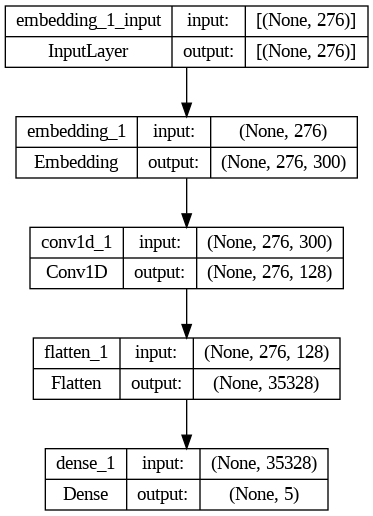

In [ ]:
#print model
plot_model(model, show_shapes=True)

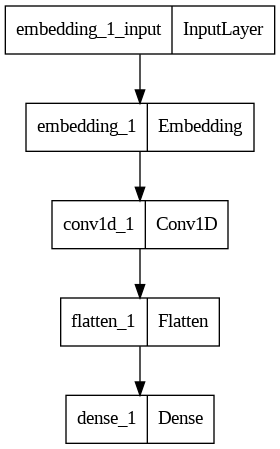

In [ ]:
#print model
plot_model(model, show_shapes=False)

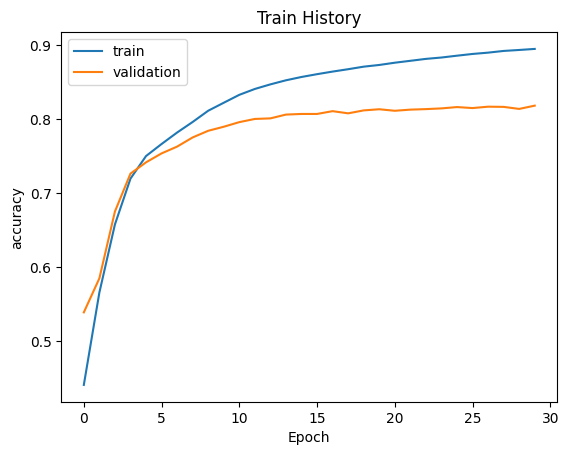

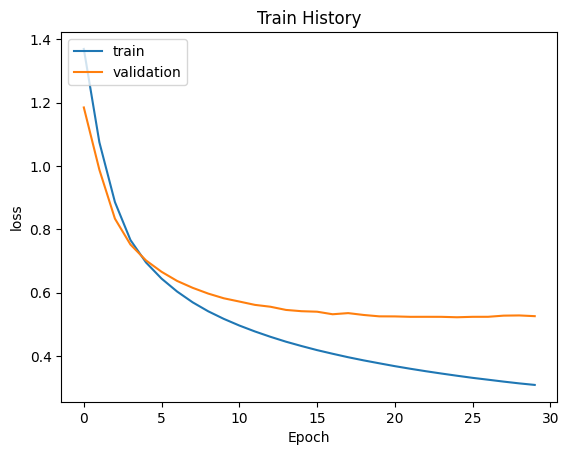

Accuracy on training data is:- 89.50638175010681 %
Loss 30.843585729599
Accuracy on validation data is:- 81.83861970901489 %
Loss 52.55962014198303


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history.history[train])
    plt.plot(train_history.history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(model,'accuracy','val_accuracy')
show_train_history(model,'loss','val_loss') 
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
print(f"Accuracy on training data is:- {acc[-1]*100} %")
print(f"Loss {loss[-1]*100}")
print(f"Accuracy on validation data is:- {val_acc[-1]*100} %")
print(f"Loss {val_loss[-1]*100}")

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score

# show_train_history(model1,'accuracy','val_accuracy')
# show_train_history(model1,'loss','val_loss') 
# acc = model1.history.history['accuracy']
# val_acc = model1.history.history['val_accuracy']
# loss = model1.history.history['loss']
# val_loss = model1.history.history['val_loss']
# print(f"Accuracy on training data is:- {acc[-1]*100} %")
# print(f"Loss {loss[-1]*100}")
# print(f"Accuracy on validation data is:- {val_acc[-1]*100} %")
# print(f"Loss {val_loss[-1]*100}")

In [ ]:
# pred = np.argmax(model1.predict(X_test), axis =1)
# slabels=np.argmax(y_test, axis=1)
# print("F1-score of Model:",f1_score(slabels,pred, average='macro'))
# print(classification_report(slabels,pred))

In [ ]:
pred = np.argmax(model.predict(X_test), axis =1)
slabels=np.argmax(y_test, axis=1)
print("F1-score of Model:",f1_score(slabels,pred, average='macro'))
print(classification_report(slabels,pred))

811/811 [==============================] - 1s 2ms/step
F1-score of Model: 0.7860127731008555
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8947
           1       0.82      0.85      0.84      7919
           2       0.77      0.74      0.75      3548
           3       0.81      0.76      0.79      3529
           4       0.68      0.64      0.66      2000

    accuracy                           0.83     25943
   macro avg       0.79      0.78      0.79     25943
weighted avg       0.82      0.83      0.82     25943



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(slabels, pred)
cm

array([[8040,  476,  170,  140,  121],
       [ 448, 6767,  301,  199,  204],
       [ 248,  362, 2623,  178,  137],
       [ 195,  316,  188, 2694,  136],
       [ 193,  282,  127,  116, 1282]])

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_confusion_matrix
cm2 = confusion_matrix(slabels, pred,normalize="true")
categories = ['airport', 'chruch','hospital','zoo','restaurant']
make_confusion_matrix(cm, categories=categories, cmap='binary')


ImportError: ignored

In [ ]:
import seaborn as sns
#Visualization of Confusion Matrix
# cm2 = confusion_matrix(slabels, pred,normalize="true")
# sns.heatmap(cm2,annot=True)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm2 = confusion_matrix(slabels, pred,normalize="true", labels=['airport', 'chruch','hospital','zoo','restaurant'], )
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model.classes_)
disp.plot()
plt.show()

ValueError: ignored